<a href="https://colab.research.google.com/github/wilbs43/geometric-algos/blob/master/nonoverlapping_disks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import random
import math

## Create disks

map_side = 30  # width of possible field to have disks
num_disks = 50

disk_list = [(random.uniform(1,map_side-1),random.uniform(1,map_side-1)) for i in range(num_disks)] 

assignments carries 22 disks [(3.578347698352365, 3.7466016387334338), (5.724402212673711, 12.330831226388726), (1.9499796396423927, 11.719381282013412), (6.432685428140621, 9.047248953186077), (1.7507324728718778, 19.67080231698242), (4.0300277355378995, 21.4613010442622), (1.2827892688189766, 27.198953403367483), (3.207306923914286, 26.550476712919192), (13.907075434891107, 1.2015159563083113), (14.100354297037438, 3.8339451769342556), (9.494541370983416, 14.870878381321736), (12.98852763951675, 20.461678090562778), (10.263590748801024, 21.789545617343688), (14.585379013147467, 18.155339126509368), (9.028744632328603, 19.823888521096443), (19.14172292331589, 1.6999146065434312), (21.966660911055286, 14.320759269023267), (20.56716939783707, 28.644019510305625), (22.800778664746232, 25.788957552951363), (26.45256064721135, 3.1751076451074227), (28.535009017230248, 11.326147418331391), (27.33219805611505, 26.902436652130397)]


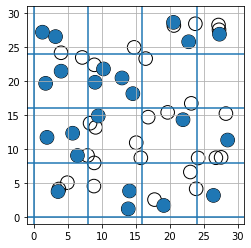

In [23]:
## create overlayed grid and make assignments
k = 8  # overlayed grid width

buckets = math.floor(map_side / k)
# print(buckets)
assignments = [[[] for i in range(buckets+1)] for j in range(buckets+1)]

for c in disk_list:
  x = math.floor(c[0] / k)
  x_rem = c[0] - x * k
  y = math.floor(c[1] / k)
  y_rem = c[1] - y * k
  if x_rem <= k-1 and x_rem >= 1 and y_rem <= k-1 and y_rem >= 1:
    assignments[x][y].append(c)


## find in each square
accumulated_centers = []
for x in range(len(assignments)):
  for y in range(len(assignments)):
    num, centers = recursive_finder([], assignments[x][y])
    # print(num,centers)
    accumulated_centers += centers
print('assignments carries',len(accumulated_centers),'disks',accumulated_centers)

## script for finding non-overlapping disks in single square
# could be made far more efficient by considering combinations rather than permutations

def recursive_finder(current_list, remaining_list):
  '''
  will return number of non-interlapping and a list of them
  postcondition: current_list is unchanged
  '''
  
  if (len(remaining_list) == 0):
    return len(current_list), current_list
  num_nonoverlap = 0
  best_list = []
  for candidate in remaining_list:
    nextCandidate = False;
    for current in current_list:
      if isIntersect(candidate,current):
        nextCandidate = True
        break
    if not nextCandidate:
      remaining_list.remove(candidate)
      num, recursed_list = recursive_finder(current_list + [candidate],remaining_list)
      remaining_list.append(candidate)
      if num > num_nonoverlap:
        num_nonoverlap = num
        best_list = recursed_list
  # print('Called on', current_list,remaining_list)
  # print('returned', best_list)
  
  if (len(best_list) == 0):
    return len(current_list), current_list
  return len(best_list), best_list


def isIntersect(a,b):
  return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2) < 2;

## plotting
fig, ax = plt.subplots()
for center in disk_list:
  circ = plt.Circle(center,1,fill=False)
  ax.add_artist(circ)

for center in accumulated_centers:
  circ = plt.Circle(center,1,fill=True)
  ax.add_artist(circ)

for v in range(0,map_side+1,k):
  plt.axvline(x=v)
  plt.axhline(y=v)

ax.set_aspect(1)
plt.xlim(-1,map_side+1)
plt.ylim(-1,map_side+1)
plt.grid()
plt.show()

In [24]:
print(recursive_finder([],[(3,1),(2,1),(4,1)]))

(2, [(4, 1), (2, 1)])
